# 多因子数据探索

### 假设检验

In [4]:
import numpy as np
import scipy.stats as ss

In [5]:
# 生成正态分布
norm_dist = ss.norm.rvs(size=20)
norm_dist

array([ 0.54583651,  0.12684918,  0.4429434 , -0.42516543,  0.49901631,
        0.12287419, -0.36590323, -0.97259822, -0.30700347,  0.06935185,
        0.79107645,  1.6017795 ,  0.36359728, -0.54685468,  0.23501521,
       -0.17216385,  1.15114342, -0.26190627, -1.3299745 ,  0.79158252])

In [6]:
# 基于偏度和峰度的正态检验
ss.normaltest(norm_dist)

NormaltestResult(statistic=0.23319240531955351, pvalue=0.8899444778325278)

In [7]:
# 卡方检验
ss.chi2_contingency([[15,95],[85,5]])

(126.08080808080808, 2.9521414005078985e-29, 1, array([[55., 55.],
        [45., 45.]]))

In [8]:
# 独立t分布检验，检验两组值的均值是否有比较大的差异性
ss.ttest_ind(ss.norm.rvs(size=10),ss.norm.rvs(size=20))

Ttest_indResult(statistic=-0.06670275173565719, pvalue=0.9472923595793121)

In [9]:
ss.ttest_ind(ss.norm.rvs(size=100),ss.norm.rvs(size=200))

Ttest_indResult(statistic=0.6690022317186542, pvalue=0.5040119878623686)

In [10]:
a = [19,22,38,77.6,52]
b = [19.5,23,39,77.9,52]
ss.ttest_ind(a,b)

Ttest_indResult(statistic=-0.037019439471572595, pvalue=0.9713765928038277)

In [11]:
# f检验，方差检验
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48])

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

### QQ图

除了通过假设检验的方法，还可通过QQ图对比一个分布和已知的分布是否一致

已知一个分布可以找到分位数，对应的分位数找到正态分布的分位数，横轴是正态分布分位数的值，纵轴是已知分布的值，得到一个曲线或散点图，这个图正对着x轴和y轴的角平分线，和平分线重合，就是符合分布的

In [12]:
from statsmodels.graphics.api import qqplot
from matplotlib import pyplot as plt
%matplotlib inline

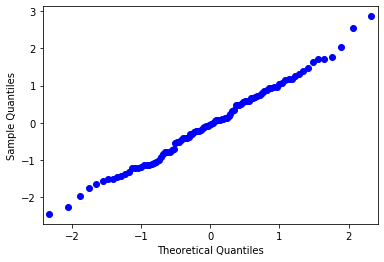

In [13]:
# QQ图默认对比已知分布和正态分布的一致性
plt.show(qqplot(ss.norm.rvs(size=100)))

### 相关系数

In [14]:
import pandas as pd

In [15]:
s1 = pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2 = pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])
# 皮尔逊相关系数
s1.corr(s2)

0.9333729600465923

In [16]:
# spearman相关系数
s1.corr(s2,method='spearman')

0.7142857142857144

In [17]:
df = pd.DataFrame([s1,s2])
df

,0,1,2,3,4,5,6
0,0.1,0.2,1.1,2.4,1.3,0.3,0.5
1,0.5,0.4,1.2,2.5,1.1,0.7,0.1


In [18]:
# df是针对列进行相关系数计算，所以需要转化
df.corr()

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
1,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
2,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
5,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0


In [20]:
# 转化成np.array(),求转置，再计算相关系数
df = pd.DataFrame(np.array([s1,s2]).T)
df

,0,1
0,0.1,0.5
1,0.2,0.4
2,1.1,1.2
3,2.4,2.5
4,1.3,1.1
5,0.3,0.7
6,0.5,0.1


In [21]:
df.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


In [22]:
df.corr(method='spearman')

,0,1
0,1.000000,0.714286
1,0.714286,1.000000


### 线性回归 y = wx + b

In [23]:
x = np.arange(10).astype(np.float).reshape((10,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [24]:
y = x * 3 + 4 + np.random.random((10,1))
y

array([[ 4.28641058],
       [ 7.94062331],
       [10.38510338],
       [13.28458232],
       [16.82820008],
       [19.32953052],
       [22.31209976],
       [25.5777032 ],
       [28.10107974],
       [31.76226065]])

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# 拟合
res = reg.fit(x,y)
# 求估计值
y_pred = res.predict(x)
y_pred

array([[ 4.50932133],
       [ 7.50297422],
       [10.49662712],
       [13.49028001],
       [16.48393291],
       [19.4775858 ],
       [22.4712387 ],
       [25.46489159],
       [28.45854448],
       [31.45219738]])

In [26]:
# 参数w
reg.coef_

array([[2.99365289]])

In [27]:
# 截距b
reg.intercept_

array([4.50932133])

### PCA主成分分析

In [28]:
data = np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),
                 np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [29]:
# sklearn中的PCA方法，使用的是奇异值分解SVD的方法
from sklearn.decomposition import PCA
# 降维-降成1维
lower_dim = PCA(n_components=1)
lower_dim.fit(data)
# 降维后维度的属性
lower_dim.explained_variance_ratio_

array([0.96318131])

In [30]:
# 直接得到转化后的数值
lower_dim.fit_transform(data)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

In [31]:
# 手写实现PCA方法，求协方差矩阵，求特征值和特征向量，得到转化后的值
def myPCA(data,n_components=1000000):
    # 对每列求均值
    mean_vals = np.mean(data,axis=0)
    # 每个数减去均值
    mid = data - mean_vals
    # 得到协方差矩阵
    cov_mat = np.cov(mid,rowvar=False)
    # 导入线性计算包
    from scipy import linalg
    # 求特征值和特征向量
    eig_vals,eig_vects = linalg.eig(np.mat(cov_mat))
    # 对特征值排序，记录索引
    eig_val_index = np.argsort(eig_vals)
    # 取k个最大的特征值
    eig_val_index = eig_val_index[:-(n_components+1):-1]
    eig_vects = eig_vects[:,eig_val_index]
    # 点乘求降维后的矩阵
    low_dim_mat = np.dot(mid,eig_vects)
    return low_dim_mat,eig_vals

myPCA(data,n_components=1)

(array([[-0.82797019],
        [ 1.77758033],
        [-0.99219749],
        [-0.27421042],
        [-1.67580142],
        [-0.9129491 ],
        [ 0.09910944],
        [ 1.14457216],
        [ 0.43804614],
        [ 1.22382056]]), array([0.0490834 +0.j, 1.28402771+0.j]))